In [219]:
from rhyme_rus.utils.sounds_statistics import SoundsStatistics
from rhyme_rus.utils.nn_usage import NnUsage
from timeit import default_timer as timer
from pathlib import Path
import json
import dill
from slugify import slugify
from rhyme_rus.rhyme import rhyme, rhyme_with_stressed_word
import matplotlib.pyplot as plt 
 


# df_n_vowels_after_stress

In [2]:
df_n_vowels_after_stress= SoundsStatistics.make_df_n_vowels_after_stress()
df_n_vowels_after_stress

,vowels,sounds,freq
0,8,17,1
1,7,17,1
2,7,16,4
3,6,16,5
4,8,15,1
5,7,15,4
6,5,15,16
7,6,15,29
8,7,14,2
9,4,14,3


In [3]:
def get_vowels_sounds_pairs(df_n_vowels_after_stress):
    length = len(df_n_vowels_after_stress)
    number_of_words = 1
    vowels_sounds_pairs = []
    for i in range(length):
        i_row = df_n_vowels_after_stress.iloc[i]
        n_vowels = i_row.vowels
        n_sounds = i_row.sounds
        vowels_sounds_pairs.append(list((n_vowels, n_sounds, number_of_words)))
    vowels_sounds_pairs.reverse()
    return vowels_sounds_pairs
vowels_sounds_pairs = get_vowels_sounds_pairs(df_n_vowels_after_stress)
vowels_sounds_pairs[:2]    
         

[[1, 1, 1], [2, 2, 1]]

In [4]:
def get_not_null_tuple(pair):
    tuple_word_sound = SoundsStatistics.get_items_by_n_vowels_after_stress(*pair)
    if (tuple_word_sound != [] 
        and tuple_word_sound[0][0].islower() 
        and "-" not in tuple_word_sound[0][0]):
        word_with_stress = tuple_word_sound[0][0]
        return word_with_stress
    return get_not_null_tuple(pair)
pair = (4,5,1)
get_not_null_tuple(pair) 

"а'удио"

# make_progression_words

In [188]:
def make_progression_words(vowels_sounds_pairs, path_pw):
    path = path_pw
    if Path(path).exists():
        with open(path, "rb") as f:
           progression_words = dill.load(f)
           print(progression_words)
    else:
        progression_words = []
        for pair in vowels_sounds_pairs:
            word_with_stress = get_not_null_tuple(pair)
            progression = list((word_with_stress, pair[:-1]))
            print(progression)
            progression_words.append(progression)
        # one-syllabel word cannot be rhymed
        progression_words = progression_words[1:]
        
        with open(path_pw, "wb") as f:
            dill.dump(progression_words, f)
    
    return progression_words

# assess_time_of_rhyme_search

In [6]:
def assess_time_of_rhyme_search(progression_words, path_wlt):
    path = path_wlt
    if Path(path).exists():
        with open(path, "rb") as f:
            word_length_time = dill.load(f)
    else:
        data =[]
        with open(path, 'wb') as f:
            dill.dump(data, f)

        word_length_time = []
        # rhymes_output = []
        for word in progression_words:
            
            start = timer()
            output = rhyme_with_stressed_word(
                word_with_stress = word[0],
                max_length_pat_of_ipa=6,
                list_score_numbers=range(0, 45, 5),
                max_number_hard_sounds_in_one_pat=1)
            # rhymes_output.append(output) 
            end = timer()
            time_of_rhyming = end - start
            
            with open(path_wlt, 'rb') as f:
                data = dill.load(f)
            
            new_data = list((time_of_rhyming, word))
            print(new_data)   
            data.append(new_data)
            
            with open(path_wlt, 'wb') as f:
                dill.dump(data, f)
                
            word_length_time.append(new_data)
        
    return word_length_time

In [ ]:
def word_length_time_comparison(vowel_sounds_pairs):
    list_word_length_time = []
    for i in range(4,5,1):
        path_pw = "progression_words_0{}.pkl".format(i)
        path_wlt = "word_length_time_0{}.pkl".format(i)
        progression_words = make_progression_words(vowels_sounds_pairs, path_pw)
        word_length_time = assess_time_of_rhyme_search(progression_words, path_wlt)
        list_word_length_time.append(word_length_time)
        
    return list_word_length_time
list_word_length_time = word_length_time_comparison(vowels_sounds_pairs)

# drawing chart of word_length_time 


In [52]:
def upload_all_word_length_files(file_indexes):
    list_word_length_time = []
    for i in file_indexes:
        with open("word_length_time_0{}.pkl".format(i), "rb") as f:
            word_length_time = dill.load(f)
        list_word_length_time.append(word_length_time)
    return list_word_length_time

file_indexes = range(5)
list_word_length_time = upload_all_word_length_files(file_indexes)
list_word_length_time[0][0]

[4.229580599999736, ['уи', [2, 2]]]

In [123]:
def make_list_x_y(list_word_length_time):
    list_x_y =[]
    for i, word_length_time in enumerate(list_word_length_time): 
        length = len(word_length_time)
        y = [round(time[0]/60, 2) for time in word_length_time]
        x = [i for i in range(length)]
        list_x_y.append((x, y))
    return list_x_y 
list_x_y = make_list_x_y(list_word_length_time)


In [197]:
len(list_x_y[0][0])
len(df_n_vowels_after_stress)

54

In [200]:
def remove_short_list_x_y(list_x_y, df_n_vowels_after_stress):
    target_len = len(df_n_vowels_after_stress)-1
    proper_list_x_y = [x_y for x_y in list_x_y if len(x_y[0]) == target_len and len(x_y[1]) == target_len]
    return proper_list_x_y
list_x_y = remove_short_list_x_y(list_x_y, df_n_vowels_after_stress)  

In [201]:
def make_ticks(list_word_length_time):
    source_for_ticks = 4
    my_xticks = [(time[1][0] + " - " + str(time[1][1])) for time in list_word_length_time[source_for_ticks]]
    return my_xticks
my_xticks = make_ticks(list_word_length_time)
my_xticks[0]

"о'у - [2, 2]"

In [161]:
print(list_x_y[0][1], list_x_y[1][1])

[0.07, 0.01, 0.04, 0.03, 0.11, 0.07, 0.1, 0.97, 0.38, 0.3, 0.25, 0.71, 0.5, 1.06, 0.63, 1.09, 2.87, 3.29, 7.82, 1.48, 1.12, 1.52, 1.41, 2.48, 1.11, 2.81, 1.91, 2.74, 3.88, 2.05, 1.64, 2.91, 3.74, 2.45, 1.83, 3.78, 1.39, 2.61, 2.91, 2.48, 2.69, 1.88, 2.23, 3.5, 1.65, 3.34, 3.83, 2.77, 1.95, 3.85, 2.44, 3.44, 1.24] [0.01, 0.02, 0.03, 0.03, 0.14, 0.13, 0.13, 0.37, 0.16, 0.3, 0.24, 0.5, 0.49, 1.14, 0.85, 1.06, 1.75, 0.97, 3.78, 2.02, 0.98, 1.89, 2.12, 2.97, 2.31, 3.2, 3.39, 4.43, 3.7, 3.42, 3.06, 3.23, 2.58, 1.51, 1.81, 1.02, 3.16, 3.46, 3.45, 1.82, 3.82, 2.84, 2.48, 3.27, 1.77, 2.84, 3.73, 1.37, 1.74, 1.0, 2.77, 3.77, 1.29]


In [208]:
def calc_list_y_average(list_x_y):
    length = len(list_x_y[0][1])
    sequence_of_matching_y = []
    for i in range(length):    
        list_y = []
        for x_y in list_x_y:
            y_sequence = x_y[1]
            y = y_sequence[i]
            list_y.append(y)
        sequence_of_matching_y.append(list_y)
    list_y_average = []
    for smy in sequence_of_matching_y:
        avr = sum(smy)/len(smy)
        list_y_average.append(avr)
    
    return list_y_average
list_y_average = calc_list_y_average(list_x_y)
list_y_average[:3]   
        

[0.03333333333333333, 0.013333333333333334, 0.030000000000000002]

In [221]:
print(len(df_n_vowels_after_stress))
print(len(list_y_average))
print(len(list_x_y[0][0])
print(len(my_xticks))

SyntaxError: '(' was never closed (3268912195.py, line 3)

<Axes: >

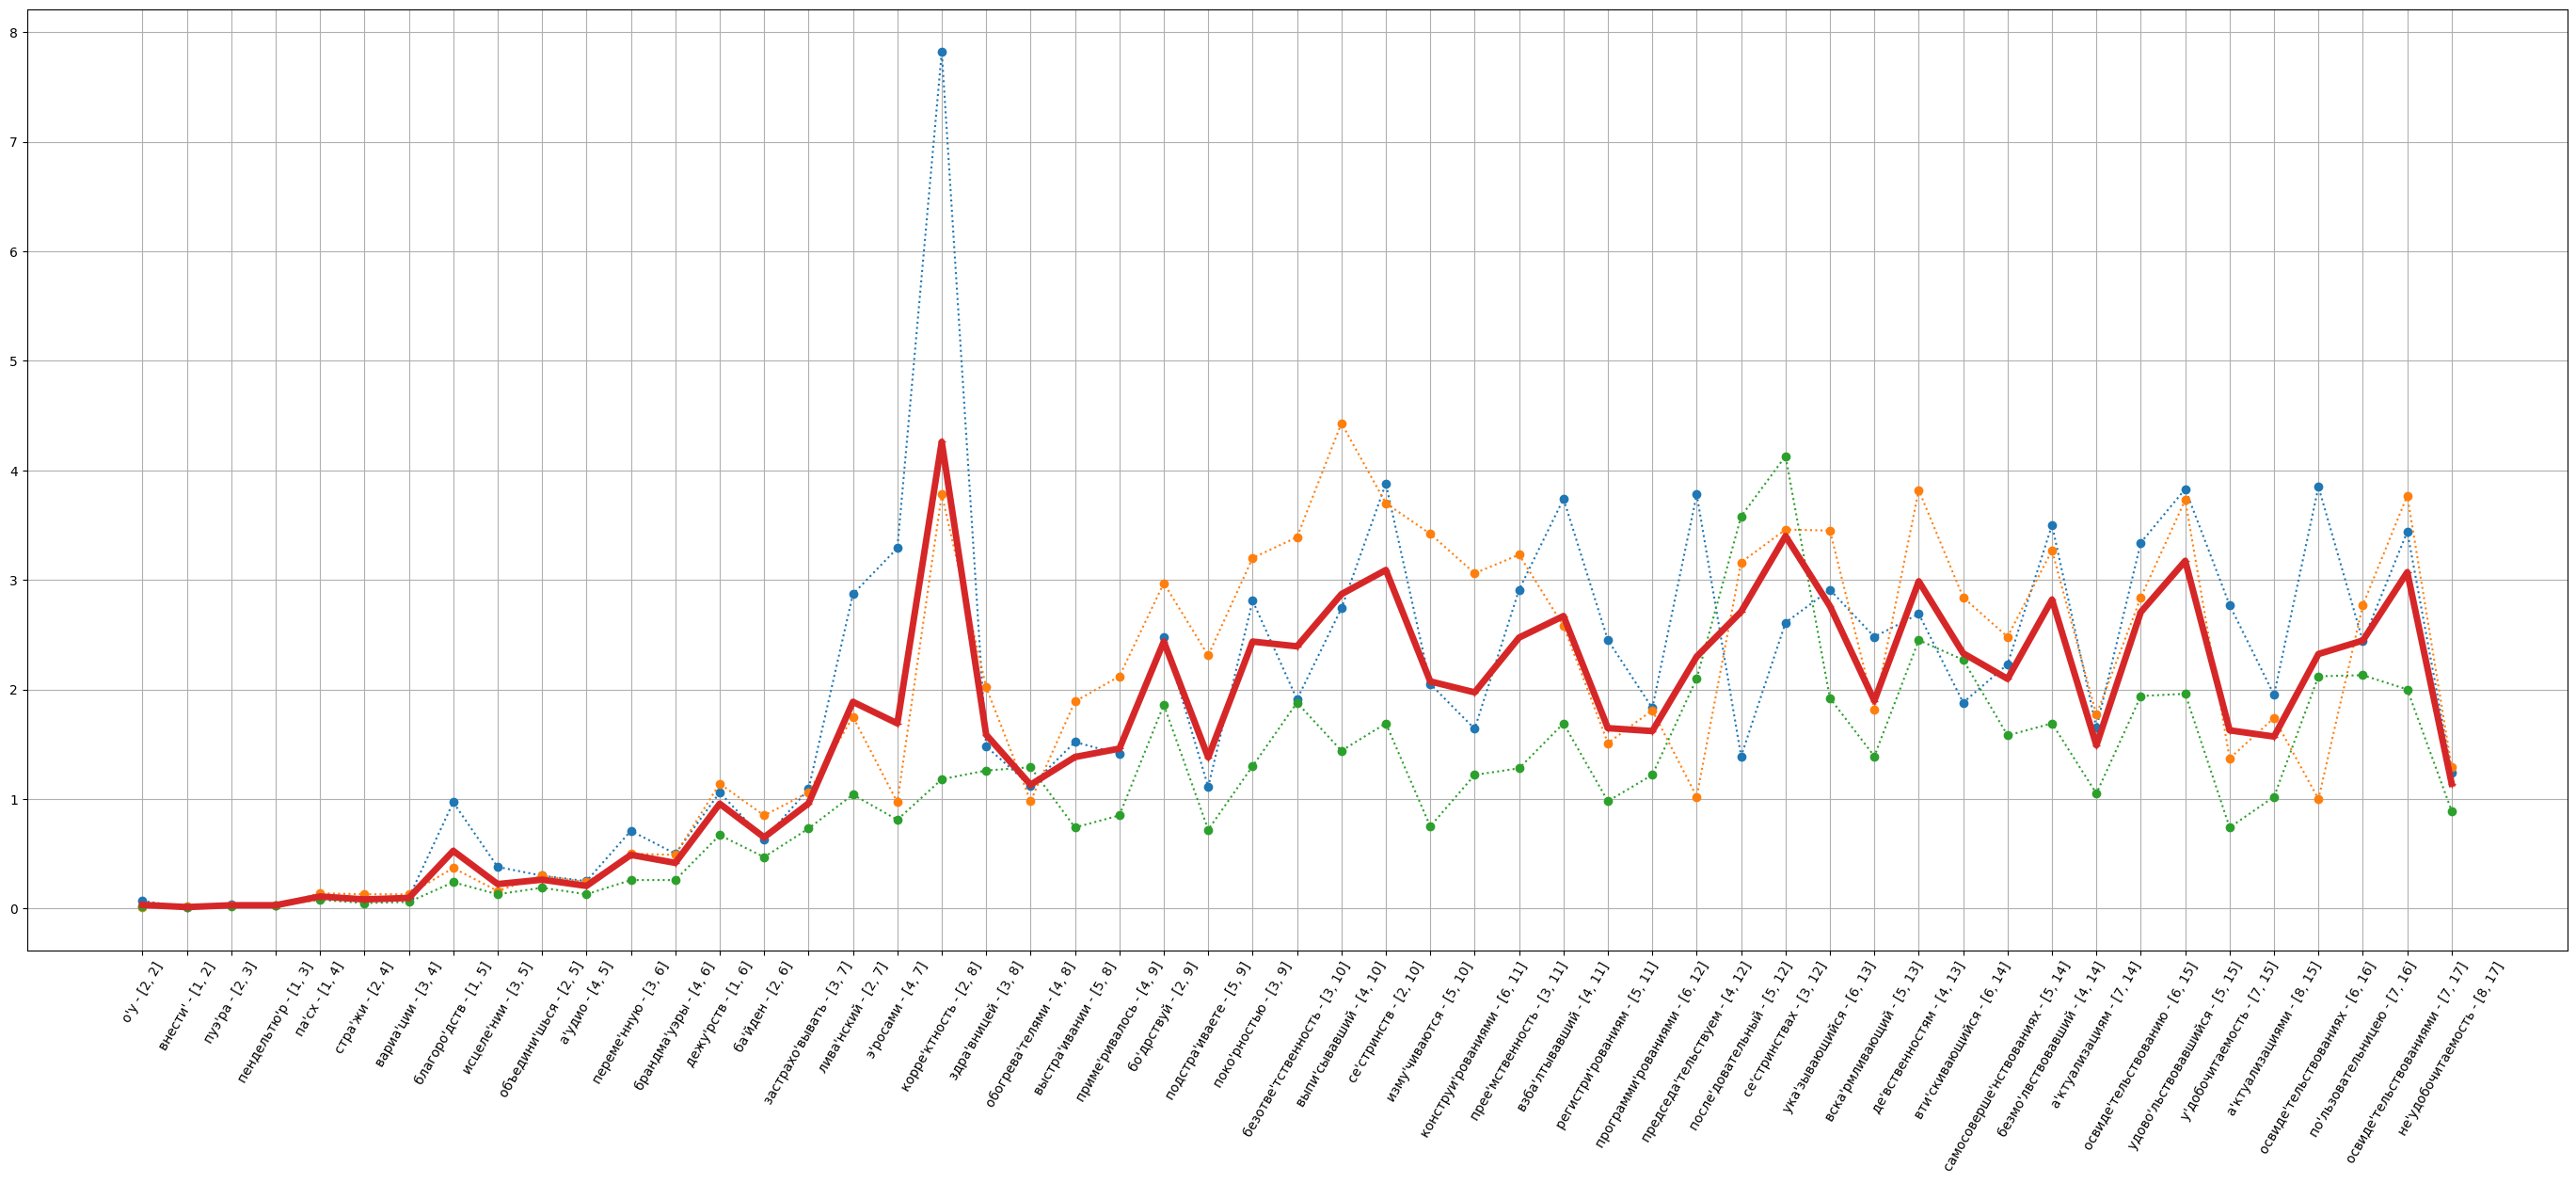

In [ ]:
def draw_charts(list_x_y, my_xticks):
    fig = plt.figure(figsize=(27,10))
    ax = fig.add_axes([0,0,1,1])
    ax.grid()
    for x_y in list_x_y:
        ax.plot(x_y[0], x_y[1], marker = "o", ls = ':')
    
    list_y_average = calc_list_y_average(list_x_y)
    ax.plot(list_x_y[0][0], list_y_average, marker = "+", linewidth = '5.0')
    
    ax.set_xticks(list(range(len(my_xticks))))
    ax.set_xticklabels(my_xticks, rotation = 60)
    ax.set_xlabel("word-sounds-vowels")
    ax.set_ylabel("minutes to find rhymes")
    fig.savefig("depth_time_all.png", bbox_inches = "tight")
    
    return ax
draw_charts(list_x_y, my_xticks)

In [222]:
output = rhyme("освидетельствованию")

Algorythm reduced combinations for освиде'тельствованию down to 6 sounds after stressed vowel
Algorythm produces patterns, which include only 1 CPU-consuming parameter


# explore rhyme config vs time

In [79]:
nested_list_score_numbers = [list(range(0, i, 5)) for i in range(20, 80, 5)]
print("list_score",nested_list_score_numbers) 
list_max_length_pat_of_ipa = list(range(6,18,1))
print("list_max_length_pat_of_ipa", list_max_length_pat_of_ipa) 
list_max_number_hard_sounds_in_one_pat = [1,2]
print("list_max_number_hard_sounds_in_one_pat", list_max_number_hard_sounds_in_one_pat)
#(7,17)
word_without_stress = "освитедельствованиями"
print("word_without_stress", word_without_stress) 

list_score [[0, 5, 10, 15], [0, 5, 10, 15, 20], [0, 5, 10, 15, 20, 25], [0, 5, 10, 15, 20, 25, 30], [0, 5, 10, 15, 20, 25, 30, 35], [0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]]
list_max_length_pat_of_ipa [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
list_max_number_hard_sounds_in_one_pat [1, 2]
word_without_stress освитедельствованиями


In [69]:
def assess_rhyme_config_vs_time(nested_list_score_numbers, list_max_length_pat_of_ipa)  :
    word_without_stress = "отучиваю"
    
    max_number_hard_sounds_in_one_pat = 1
    
    path_time = "otuchivaju_rhyme_config_vs_time.pkl"
    path_rhyme = "otuchivaju_rhymes.pkl"
    
    if Path(path_time).exists() and Path(path_rhyme).exists():
        with open(path_time, "rb") as f:
            rhyme_config_vs_time = dill.load(f)
        with open(path_rhyme, "rb") as f:
            rhymes_outputs = dill.load(f)
    else:
        data = []
        with open(path_time, "wb") as f:
            dill.dump(data, f)
        with open(path_rhyme, "wb") as f:
            dill.dump(data, f)
                
        rhyme_outputs = []
        rhyme_config_vs_time = []
        for max_length_pat_of_ipa in list_max_length_pat_of_ipa:
            for list_score_numbers in nested_list_score_numbers: 
                start = timer()
                output = rhyme(
                    word_without_stress = word_without_stress,
                    max_length_pat_of_ipa = max_length_pat_of_ipa,
                    list_score_numbers = list_score_numbers,
                    max_number_hard_sounds_in_one_pat = max_number_hard_sounds_in_one_pat)
                end = timer()
                time_of_rhyming = end - start
                print(time_of_rhyming)
                
                rhyming_data = tuple((time_of_rhyming, 
                                    word_without_stress, 
                                    max_length_pat_of_ipa, 
                                    list_score_numbers, 
                                    max_number_hard_sounds_in_one_pat))

                rhyme_outputs.append(output)
                rhyme_config_vs_time.append(rhyming_data)

                with open(path_time, "rb") as f:
                    _rhyme_config_vs_time = dill.load(f)
                with open(path_rhyme, "rb") as f:
                    _rhymes_outputs = dill.load(f)
                
                _rhyme_config_vs_time.append(rhyming_data)           
                _rhymes_outputs.append(output)
                
                with open(path_time, "wb") as f:
                    dill.dump(_rhyme_config_vs_time, f)
                with open(path_rhyme, "wb") as f:
                    dill.dump(_rhymes_outputs, f)
                
    return rhyme_config_vs_time, rhyme_outputs



In [ ]:
rhyme_config_vs_time, rhyme_outputs = assess_rhyme_config_vs_time(list_score, list_max_length_pat_of_ipa)

In [53]:
path_time = "audio_rhyme_config_vs_time.pkl"
path_rhyme = "audio_rhymes.pkl"

if Path(path_time).exists and Path(path_rhyme).exists:
    print("yes")
else:
    print("no")

yes


In [56]:
Path(path_time).exists()

False